In [1]:
import numpy as np
import ctypes
import matplotlib.pyplot as plt
from cfunctions import C_FUNCTIONS as functions

In [2]:
%%bash 
gcc -shared -o c_functions.so -fPIC functions.c

In [3]:
## C functions
FM = functions().FM()
DfdM = functions().DfdM()
newton = functions().newton()

In [4]:
# Set parameters
P0 = 300
T0 = 600
gamma = ctypes.c_double(1.4)
tolerance = ctypes.c_double(1e-12)

# Compute A(x)
x = np.linspace(-1,1,510)
A_x = 0.2 + 0.4*(1 + np.sin(np.pi*(x - 0.5)))
A_star = 0.2 + 0.4*(1 + np.sin(np.pi*(0 - 0.5)))
A_bar = A_x/A_star
p = []
print("NEWTON SOLUTION\n")
# Main loop
print("x", "     Mach","           Temperature","        Pressure","         Density","           Velocity")
print("--------------------------------------------------------------------------------")
for i,A_ in enumerate(A_bar):
    A_ = ctypes.c_double(A_)
    if x[i]<0:
        initial_mach = ctypes.c_double(.3)

    elif x[i]==0:
        initial_mach = ctypes.c_double(1+10e-14)
    else:
        initial_mach = ctypes.c_double(3)
    R = 8314/28.96
    M = (newton(gamma,A_,initial_mach,tolerance))
    T = functions.T(gamma.value,M,T0)
    P = functions.P(gamma.value,M,P0)
    U = functions.u(gamma.value,M,R,T)
    rho = functions.rho(P,R,T)
    p.append(P)
    print(f"{x[i]:}, {M:.14f}, {T:.14f}, {P:.14f}, {rho:.14f}, {U:.14f}")



NEWTON SOLUTION

x      Mach            Temperature         Pressure          Density            Velocity
--------------------------------------------------------------------------------
-1.0, 0.11668889438290, 598.37048183234060, 297.15801095372518, 0.00172983953604, 57.22480938755520
-0.9960707269155207, 0.11669250953810, 598.37038113634753, 297.15783592979818, 0.00172983880828, 57.22657746234779
-0.9921414538310412, 0.11670335580812, 598.37007900744538, 297.15731078732921, 0.00172983662471, 57.23188207746505
-0.9882121807465619, 0.11672143560654, 598.36957532283589, 297.15643531420437, 0.00172983298444, 57.24072440528424
-0.9842829076620825, 0.11674675295709, 598.36886987775654, 297.15520915673102, 0.00172982788600, 57.25310640029626
-0.9803536345776032, 0.11677931349533, 598.36796238533134, 297.15363181938420, 0.00172982132732, 57.26903079989995
-0.9764243614931237, 0.11681912447098, 598.36685247636376, 297.15170266445188, 0.00172981330574, 57.28850112551367
-0.9724950884086444, 0.

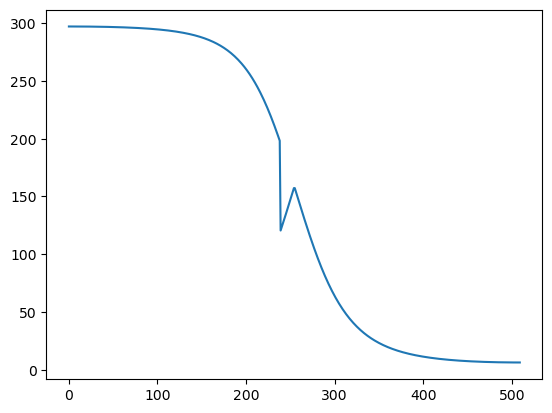

In [5]:
plt.plot(p)